<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
import scipy
import csv
from numpy import arange, dtype 
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20) 
pd.options.display.float_format = '{:.3f}'.format 

# Data Gathering

In [2]:
df=pd.read_csv("/Users/onurhanaydin/Desktop/Data Science/Dersler/Machine Learning/Assigments/Assigment-1/car_dataset.csv")
df=pd.DataFrame(df)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.644,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


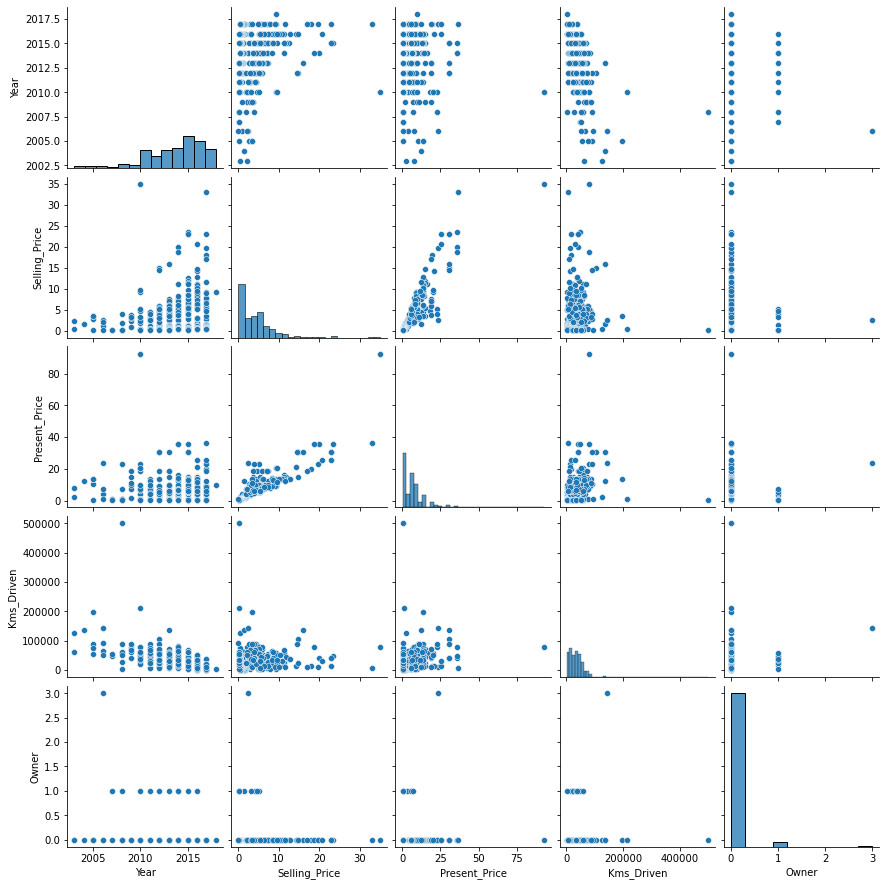

In [5]:
sns.pairplot(df);

In [6]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000,0.236,-0.048,-0.524,-0.182
Selling_Price,0.236,1.000,0.879,0.029,-0.088
Present_Price,-0.048,0.879,1.000,0.204,0.008
Kms_Driven,-0.524,0.029,0.204,1.000,0.089
Owner,-0.182,-0.088,0.008,0.089,1.000


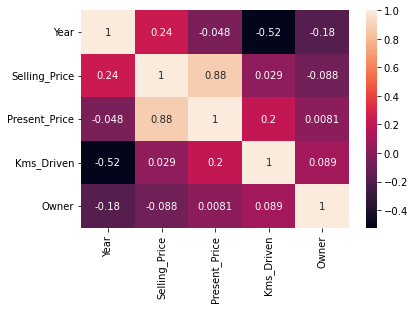

In [7]:
sns.heatmap(df.corr(), annot = True);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [8]:
df.drop(["Car_Name"],axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [9]:
df=pd.get_dummies(df, drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.350,5.590,27000,0,0,1,0,1
1,2013,4.750,9.540,43000,0,1,0,0,1
2,2017,7.250,9.850,6900,0,0,1,0,1
3,2011,2.850,4.150,5200,0,0,1,0,1
4,2014,4.600,6.870,42450,0,1,0,0,1


### Features and target variable

In [10]:
X=df.drop("Selling_Price", axis=1) # Feature
y=df["Selling_Price"] # Target 

### Splitting data into training and testing

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

##  Model Building (Linear Regression)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
y_pred

array([ 2.81694613,  8.0219717 ,  6.62419684, -1.47967587,  8.9148687 ,
        7.56978311,  1.38917767,  0.86717897,  1.41044792,  7.63177508,
        9.19555785,  0.64644643,  8.08030103,  3.2484837 ,  7.04658891,
        3.08477422,  0.50276806, 10.48960716,  1.790244  ,  2.35595178,
        0.43104472,  8.22753486,  6.74700642,  2.6123948 ,  0.83761863,
        3.65227549,  5.20869408,  2.81058233,  2.16740557,  1.79302018,
        0.43706542,  9.24076007, -0.61127887,  2.27699949,  8.70260141,
        4.45151727,  7.13407408,  7.39391401,  2.91857092,  7.77380479,
        3.86541561,  4.11807969,  4.27231023,  0.68712811,  7.48017157,
        0.53829335,  7.18097683, 10.86798394,  3.11706539,  5.57073621,
        6.5295263 ,  2.19802144, 20.26328169, 16.70924352,  7.68557671,
        9.37259627,  4.40061883,  9.0803589 ,  1.78645146,  7.31552873,
        0.28862714, -2.43218949,  1.98384337, -1.49297453,  4.71951589,
        1.83428505, 19.93406836, 18.06338799,  5.34629227, -0.53

# Interpret the model

In [15]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
177,0.350,2.817,-2.467
289,10.110,8.022,2.088
228,4.950,6.624,-1.674
198,0.150,-1.480,1.630
60,6.950,8.915,-1.965
...,...,...,...
119,1.050,0.948,0.102
19,2.650,3.408,-0.758
181,0.300,1.226,-0.926
79,14.500,16.778,-2.278


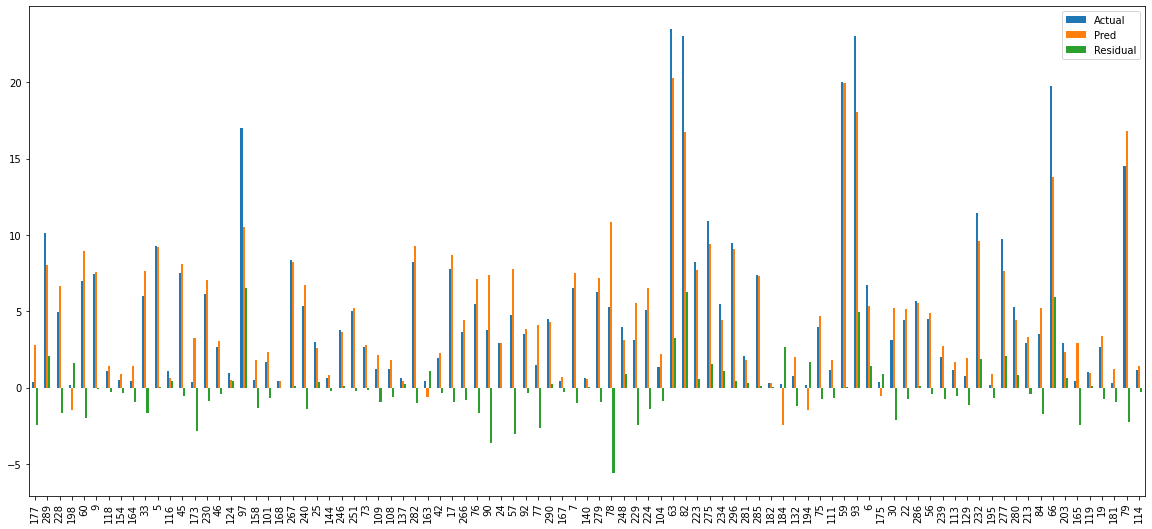

In [16]:
comparing.plot(kind ="bar", figsize=(20,9))
plt.show();

# Model Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [19]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8756155246205283
MAE 		: 1.2698356709059342
MSE 		: 3.541748500948388
RMSE 		: 1.8819533737445218


In [20]:
y_train_pred = model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8828030918602581
MAE 		: 1.146980681038039
MSE 		: 2.8763210780593336
RMSE 		: 1.6959720157064306


# Regularization

## Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train) # Scaling is applied for ONLY train dataset !!!

# Transform is applied in order to prevent data leakage between train and test data
X_train_scaled=scaler.transform(X_train) 
X_test_scaled=scaler.transform(X_test)

# Ridge

In [38]:
from sklearn.linear_model import Ridge, RidgeCV

ridge_model = Ridge(random_state=42)

In [39]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [44]:
y_pred = ridge_model.predict(X_test_scaled)

In [45]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [46]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8016315981221219
MAE 		: 1.503885736058302
MSE 		: 5.648381663733364
RMSE 		: 2.376632420828548


In [25]:
ridge_model.alpha

1.0

In [47]:
ridgecv = RidgeCV(alphas=np.linspace(0.01, 10, 100), cv=10)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10)

In [48]:
ridgecv.alpha_

0.1109090909090909

In [49]:
y_pred=ridgecv.predict(X_test_scaled)

In [50]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8670691550983195
MAE 		: 1.3015215034808854
MSE 		: 3.785099540951483
RMSE 		: 1.9455332279227417


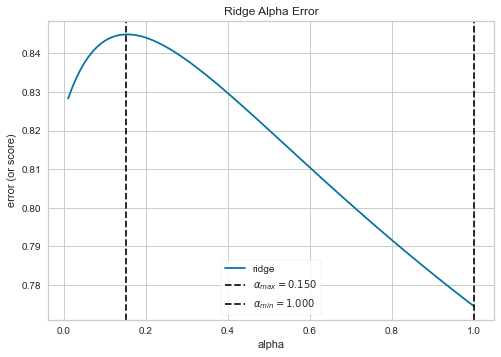

In [60]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 10, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=np.linspace(0.01, 1, 100),
    cv=10)
visualizer.fit(X_train_scaled, y_train)
visualizer.show();

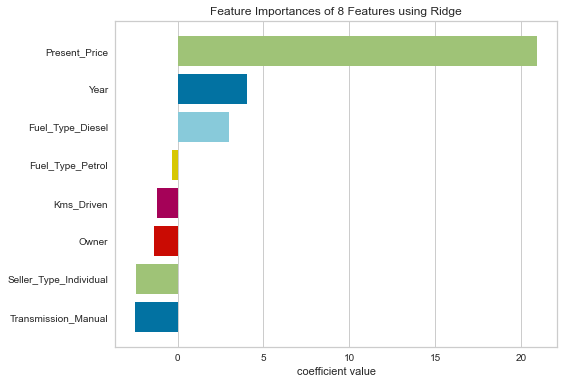

In [51]:
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.model_selection import FeatureImportances

labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)

viz.fit(X_train, y_train)
viz.show();

# Lasso

In [52]:
from sklearn.linear_model import Lasso, LassoCV

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [53]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.12172591880560901
MAE 		: 3.3723737721640132
MSE 		: 25.008152351828237
RMSE 		: 5.000815168732817


In [54]:
lasso_model.alpha

1.0

In [55]:
lassocv_model = LassoCV(alphas=np.linspace(0.001, 1, 100), cv=10)
lassocv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0....
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
        cv=10)

In [56]:
y_pred = lassocv_model.predict(X_test_scaled)

In [57]:
lassocv.alpha_

0.03127272727272727

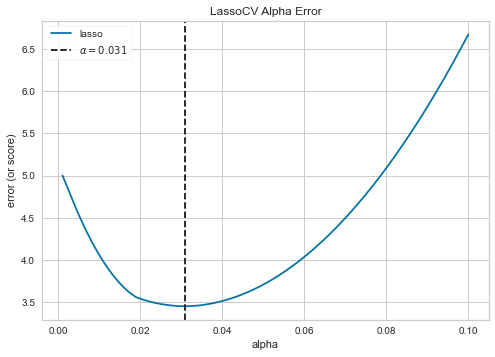

In [61]:
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.linspace(0.001,.1,100)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.show();

## Elastic-Net 

In [64]:
from sklearn.linear_model import ElasticNet, ElasticNetCV 

In [65]:
el_model = ElasticNet()
el_model.fit(X_train, y_train)
y_pred = el_model.predict(X_test)

In [66]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.17782724763828117
MAE 		: 3.241096714433818
MSE 		: 23.41071186186238
RMSE 		: 4.838461724749136


In [67]:
el_model.alpha

1.0

In [68]:
elcv_model = ElasticNetCV(alphas=np.linspace(0.001, 1, 10), l1_ratio=[0.01,0.05,0.1,0.5,0.9,0.95,0.99,1])
elcv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
             l1_ratio=[0.01, 0.05, 0.1, 0.5, 0.9, 0.95, 0.99, 1])

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
model = ElasticNet()
params = {"alpha":np.logspace(1,2,100), "l1_ratio":np.linspace(.01,1,50)}
gr_model = GridSearchCV(model, params)
gr_model.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([ 10.        ,  10.23531022,  10.47615753,  10.72267222,
        10.97498765,  11.23324033,  11.49756995,  11.76811952,
        12.0450354 ,  12.32846739,  12.61856883,  12.91549665,
        13.21941148,  13.53047775,  13.84886371,  14.17474163,
        14.50828778,  14.84968262,  15.19911083,  15.55676144,
        15.92282793,  16.29750835,  16.68100537,  17.07352647,
        17.47528...
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])})